# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [50]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable
from scipy import stats
import seaborn as sns

In [51]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [52]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


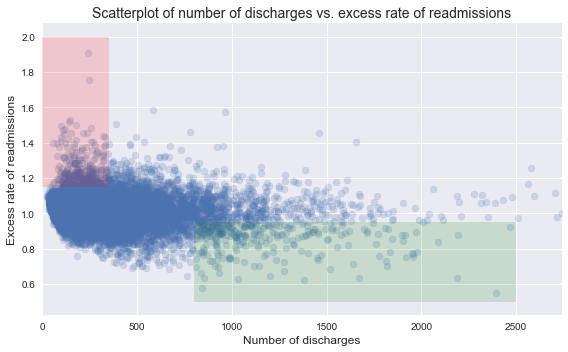

In [53]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

** QA. Do you agree with the above analysis and recommendations? Why or why not?**

The above analysis was based on graphical observation not on statistical analysis. There were only one scatterplot. No hypothesis test was conducted. 

At the regulatory policy recommendations, small capacity was defined to be smaller than 300 while 100 and 1000 were chosen to compare at the statistics section. There was not strong background why 300 is chosen to define small capacity. 

Let's check the above analysis one by one.


**A. Initial observations based on the plot above**

**- Overall, rate of readmissions is trending down with increasing number of discharges**

With the graph above, we can check that it is true that rate of readmissions is trending down with increasing number of discharges. Also, p-value close to 0 support it. 


In [45]:
x = clean_hospital_read_df['Number of Discharges']
y = clean_hospital_read_df['Excess Readmission Ratio']
df = pd.concat([x,y], axis=1)
df.columns = ['Number of Discharges', 'Excess Readmission Ratio']

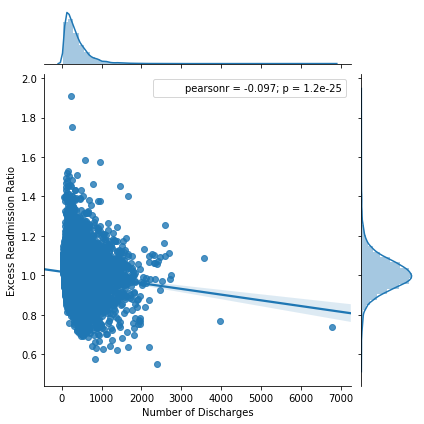

In [30]:
sns.jointplot('Number of Discharges','Excess Readmission Ratio', data=df, kind='reg')

**- With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)**

p-value is 0.32. so two variables are not significantly related statistically.  


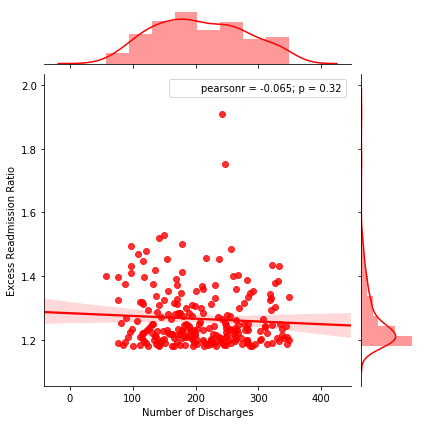

In [31]:
red = df[df['Number of Discharges']<= 350]
red = red[red['Excess Readmission Ratio'] >= 1.18]
red = red[red['Excess Readmission Ratio'] <= 2.00]
sns.jointplot('Number of Discharges', 'Excess Readmission Ratio', data=red, kind='reg', color="r")

**- With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green)**

With p-value of 0.031, we can say that it is true with 95 confidence. 

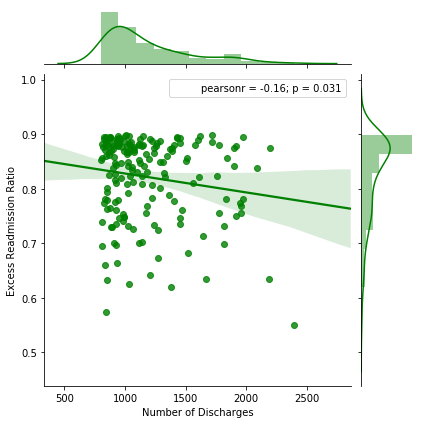

In [32]:
green = df[df['Excess Readmission Ratio']<= 0.9]
green = green[green['Number of Discharges'] >= 800]
green = green[green['Number of Discharges'] <= 2500]
sns.jointplot('Number of Discharges', 'Excess Readmission Ratio', data=green, kind='reg', color="g")

**B. Statistics**

**- In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1**

I found that the sentence above is true. Also two variables are negatively related with p-value close to 0.  


In [46]:
lo_df = df[df['Number of Discharges'] < 100]
lo_discharges, lo_excess_readmissions = lo_df.mean()
lo_greater_than_one = len(lo_df[lo_df['Excess Readmission Ratio'] > 1]) / len(lo_df)

print('Excess Readmission Ratio :', '%.3f' % lo_excess_readmissions)
print('%.2f' % lo_greater_than_one, 'have Excess Readmission Ratio greater than 1.')

Excess Readmission Ratio : 1.023
0.59 have Excess Readmission Ratio greater than 1.


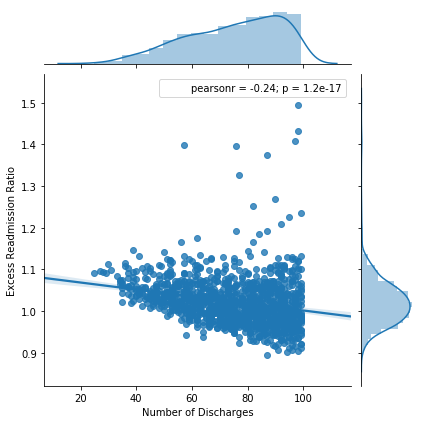

In [34]:
sns.jointplot('Number of Discharges', 'Excess Readmission Ratio', data=lo_df, kind='reg')

**- In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1**

Excess readmission rate is 1.009 and 44% have excess readmission rate greater than 1. so the statement above is not true.

In [35]:
hi_df = df[df['Number of Discharges'] < 1000]
hi_discharges, hi_excess_readmissions = hi_df.mean()
hi_greater_than_one = len(hi_df[hi_df['Excess Readmission Ratio'] > 1]) / len(hi_df)

print('Excess Readmission Ratio :', '%.3f' % hi_excess_readmissions)
print('%.2f' % hi_greater_than_one, 'have Excess Readmission Ratio greater than 1.')

Excess readmission rate : 1.009
0.52 have excess readmission rate greater than 1.


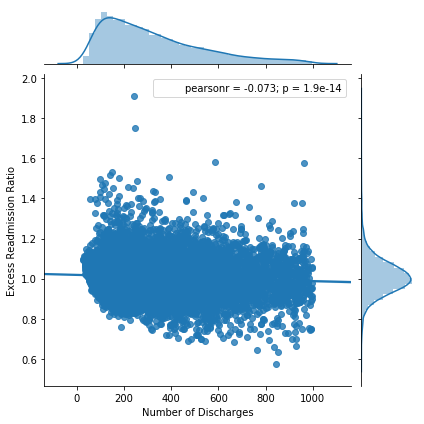

In [36]:
sns.jointplot('Number of Discharges', 'Excess Readmission Ratio', data=hi_df, kind='reg')

**C. Conclusions**

**- There is a significant correlation between hospital capacity (number of discharges) and readmission rates.**

We have p-value close to 0, therefore there is a significant corelation between two variables


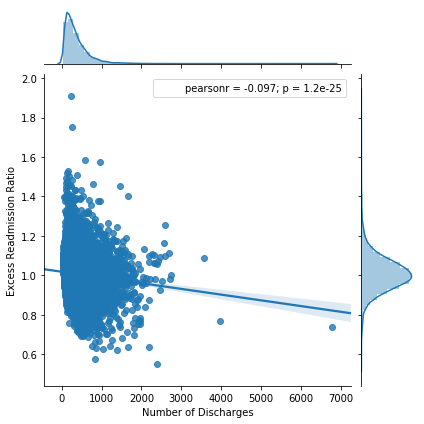

In [37]:
sns.jointplot('Number of Discharges', 'Excess Readmission Ratio', data=df, kind='reg')

**- Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.**



It can be possible, howere we should check other factors as well to check effects on excess readmission ratio. 

** QB. Provide support for your arguments and your own recommendations with a statistically sound analysis:**
    
Setup an appropriate hypothesis test

- H0: There IS NOT a significant linear relationship between number of discharges and readmission rates.

- H1: There IS a significant linear relationship between number of discharges and readmission rates.

In [55]:
gradient, intercept, r_value, p_value, std_err = stats.linregress(x,y)

print( p_value )


1.502275642661476e-23


Regression analysis generates an equation to describe the statistical relationship between one or more predictor variables and the response variable. The p-value for each term tests the null hypothesis that the coefficient is equal to zero (no effect). A low p-value (< 0.05) indicates that you can reject the null hypothesis. 

P-value here is close to 0. So we can reject the null hypothess that the coefficient is equle to zero. So there is a significant linear relationship between number of discharges and readmission rates. 




**Report statistical significance for  α
α = .01.**

P-value is the same when α = 0.01 or α = 0.05. P-value here is close to 0 which is still smaller than 0.01. Therefore, we can say that it is stil statistically significant. 


**Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?**

In [56]:
print (np.corrcoef(x,y))

[[ 1.         -0.09309554]
 [-0.09309554  1.        ]]


The correlation coefficient is -0.0931. Even though we can say statistically that there is a significant linear relationship between number of discharges and readmission rates, there is weak relationship since correlation coefficient is close to 0. Therefore I cannot recomment to demonstrate upgraded resource allocation for quality care to continue operation 

**Look at the scatterplot above.
What are the advantages and disadvantages of using this plot to convey information?
Construct another plot that conveys the same information in a more direct manner.**

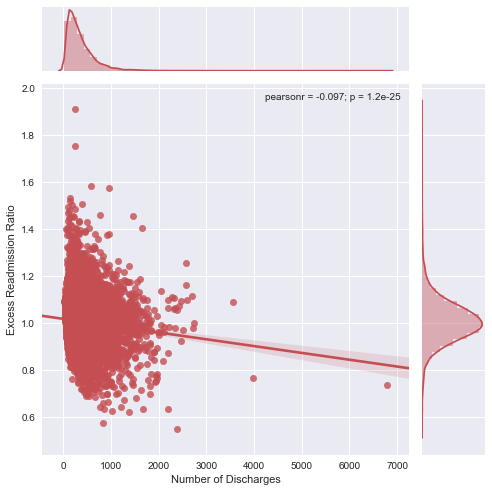

In [57]:
sns.set(style="darkgrid", color_codes=True)
sns.jointplot('Number of Discharges', 'Excess Readmission Ratio', data=clean_hospital_read_df,
              kind='reg', color='r', size=7)
plt.show()

It is hard to say about the relation with the bare eyes even though we can visualize a relationship. The line above helps us to understand the relationship between two variables. 

Let's draw bar plot of excess readmission ratio and number of discharges. 


In [58]:
nd = clean_hospital_read_df['Number of Discharges']
nd.describe()


count    11578.000000
mean       362.909397
std        309.176945
min          0.000000
25%        157.000000
50%        280.000000
75%        472.750000
max       6793.000000
Name: Number of Discharges, dtype: float64

In [59]:
nd.quantile(0.999)

2446.4970000000267

As it is dense around low number of discharges, I eliminated all data over a 99.9 percentile on number of discharges . 99.9 percentile on number of discharges is around 2446.

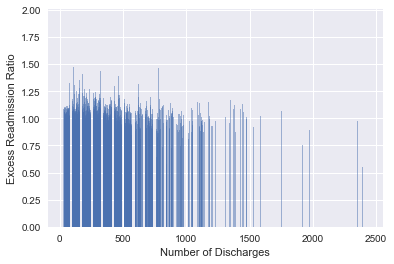

In [60]:
err = clean_hospital_read_df['Excess Readmission Ratio']

nd_999 = nd[nd < nd.quantile(0.999)]

err_999 = err[nd < nd.quantile(0.999)]


plt.bar(nd_999, err_999, align='center', alpha=0.5)

plt.xlabel('Number of Discharges')
plt.ylabel('Excess Readmission Ratio')
 
plt.show()



We can see that there are positive correlation between excess readmission ratio and number of discharges based on the bar plot.  